### ingredients_detection_model_v3
- class added - 'carrot', 'cucumber'

In [2]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

In [3]:
len(os.listdir('data/train/training_images'))

704

In [4]:
len(os.listdir('data/train/training_labels'))

704

In [5]:
len(os.listdir('data/val/validation_images'))

56

In [6]:
len(os.listdir('data/val/validation_labels'))

56

In [7]:
# !pip install detecto

In [8]:
from detecto import core, utils, visualize
from torchvision import transforms
import time
import matplotlib.pyplot as plt

In [9]:
# Convert XML files to CSV format
utils.xml_to_csv('data/train/training_labels/', 'data/train/train_labels.csv')
# utils.xml_to_csv('data/val/validation_labels/', 'data/val/val_labels.csv')

,filename,width,height,class,xmin,ymin,xmax,ymax
0,carrot_001.jpg,259,194,carrot,62,48,230,143
1,carrot_002.jpg,2000,1334,carrot,1378,280,1652,1256
2,carrot_002.jpg,2000,1334,carrot,772,80,1465,1100
3,carrot_002.jpg,2000,1334,carrot,1795,423,1958,863
4,carrot_002.jpg,2000,1334,carrot,112,370,978,890
...,...,...,...,...,...,...,...,...
1688,potato089.jpg,700,467,potato,121,122,426,419
1689,potato089.jpg,700,467,potato,336,36,594,332
1690,potato090.jpg,500,500,potato,91,208,347,388
1691,potato090.jpg,500,500,potato,213,72,455,334


### IMAGE DATA ACCURACY CHECK

In [10]:
import pandas as pd

In [11]:
train_labels = pd.read_csv('data/train/train_labels.csv')
train_labels[train_labels['class'] == 0]
# train_labels

,filename,width,height,class,xmin,ymin,xmax,ymax


In [12]:
val_labels = pd.read_csv('data/val/val_labels.csv')
train_labels[train_labels['class'] == 0]
# val_labels

,filename,width,height,class,xmin,ymin,xmax,ymax


### DELETE IMAGE DATA IF NEEDED

In [13]:
# del_image_list = train_labels[train_labels.width == 0].groupby(['filename']).sum()
# del_image_list

In [14]:
# filename = del_image_list.index.to_numpy()
# filename

In [15]:
# xml_filename = []
# for file in filename:
#   xml_filename.append(file.replace('.jpg', '.xml'))
# xml_filename

In [16]:
# location = 'train/training_labels'
# for file in xml_filename:
#   try:
#     path = os.path.join(location, file)
#     os.remove(path)
#     print('%s ahs been removed successfully' %file)
#   except Exception as ex:
#     print(f'No such file : {path}')

### LOAD DATASET - IMAGES & LABELS

In [17]:
# Define custom transforms to apply to dataset
custom_transforms = transforms.Compose([
    transforms.ToPILImage(mode='RGB'),
    transforms.Resize(800),
    transforms.RandomHorizontalFlip(0.5),
    transforms.RandomVerticalFlip(0.5),
    transforms.ColorJitter(saturation=0.3),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

In [18]:
# Pass in a CSV file instead of XML files for faster Dataset
dataset = core.Dataset('data/train/train_labels.csv', 'data/train/training_images/', transform=custom_transforms)
val_dataset = core.Dataset('data/val/val_labels.csv', 'data/val/val_images/')

In [19]:
# Create own DataLoader with custom options
loader = core.DataLoader(dataset, batch_size=2, shuffle=True)

In [20]:
model = core.Model(['chilli', 'egg', 'pork meat', 'potato', 'pa', 'onion', 'carrot', 'cucumber'])

### MODEL TRAINING

Epoch 1 of 100
Loss: 1.7636748563307219
Epoch 2 of 100
Loss: 1.5762165337323377
Epoch 3 of 100
Loss: 1.6378113211443026
Epoch 4 of 100
Loss: 1.3971560162802537
Epoch 5 of 100
Loss: 1.384660010584272
Epoch 6 of 100
Loss: 1.3635564922140195
Epoch 7 of 100
Loss: 1.3462630287290385
Epoch 8 of 100
Loss: 1.3356486410380175
Epoch 9 of 100
Loss: 1.3667201176763346
Epoch 10 of 100
Loss: 1.33440454915548
Epoch 11 of 100
Loss: 1.354265147103713
Epoch 12 of 100
Loss: 1.3496614593821459
Epoch 13 of 100
Loss: 1.3325007579361017
Epoch 14 of 100
Loss: 1.3420112060908325
Epoch 15 of 100
Loss: 1.3005774515466049
Epoch 16 of 100
Loss: 1.3331077955185602
Epoch 17 of 100
Loss: 1.3210620219126725
Epoch 18 of 100
Loss: 1.3374479869141793
Epoch 19 of 100
Loss: 1.3437244974506588
Epoch 20 of 100
Loss: 1.3370071480241723
Epoch 21 of 100
Loss: 1.3254456053941677
Epoch 22 of 100
Loss: 1.339724226687581
Epoch 23 of 100
Loss: 1.3275140648086865
Epoch 24 of 100
Loss: 1.3492607827274463
Epoch 25 of 100
Loss: 1.333399

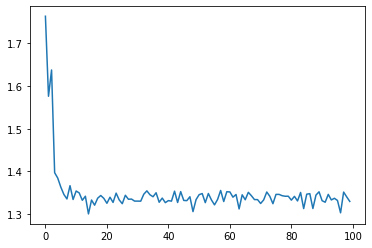

MODEL_WEIGHTS_SAVED
<class 'torchvision.models.detection.faster_rcnn.FasterRCNN'>


In [21]:
start_time = time.time()

losses = model.fit(loader, val_dataset, epochs=100, learning_rate=0.01, verbose=True)

print('TIME_TAKES', '-'*50)
print("--- %s seconds ---" % (time.time() - start_time))

print('LOSSES', '-'*50)
plt.plot(losses)
plt.show()

model.save('detection_weights_v3.pth')
print('MODEL_WEIGHTS_SAVED')

torch_model = model.get_internal_model()
print(type(torch_model))

### LOAD TEST IMAGE

In [22]:
from skimage import io

image = io.imread('./data/test_image_02.jpg')
print(type(image))

<class 'numpy.ndarray'>


### PREDICT

In [23]:
predictions = model.predict_top(image)
labels, boxes, scores = predictions

In [24]:
pred_labels = labels
pred_labels

['egg', 'pork meat', 'potato', 'chilli', 'onion', 'pa']

### DISPLAY DETECTION RESULT

In [25]:
import torch
from matplotlib import patches
import matplotlib.pyplot as plt

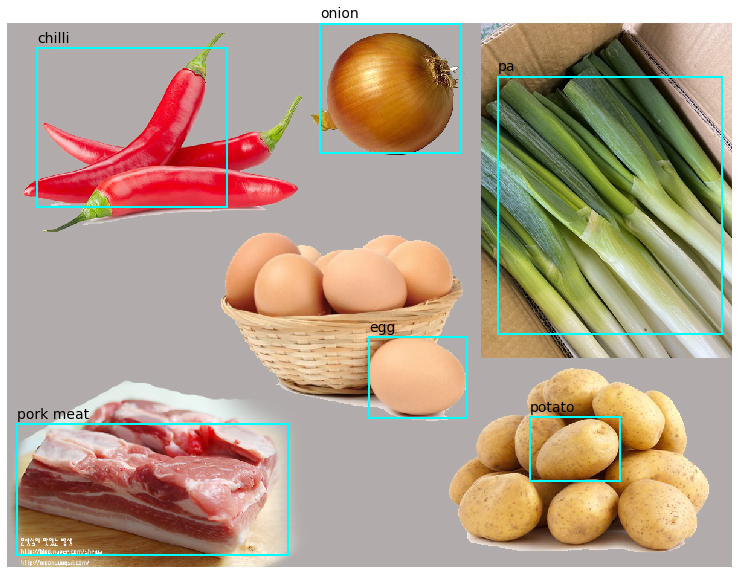

In [26]:
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(figsize=(20, 10))
fig.patch.set_visible(False)
ax.axis('off')

# If the image is already a tensor, convert it back to a PILImage
# and reverse normalize it
if isinstance(image, torch.Tensor):
    image = reverse_normalize(image)
    image = transforms.ToPILImage()(image)
ax.imshow(image)

# Show a single box or multiple if provided
if boxes.ndim == 1:
    boxes = boxes.view(1, 4)

if labels is not None and not utils._is_iterable(labels):
    labels = [labels]

# Plot each box
for i in range(boxes.shape[0]):
    box = boxes[i]
    width, height = (box[2] - box[0]).item(), (box[3] - box[1]).item()
    initial_pos = (box[0].item(), box[1].item())
    rect = patches.Rectangle(initial_pos, width, height, linewidth=2, edgecolor='cyan', facecolor='none')
    if labels:
        ax.text(box[0], box[1] - 10, '{}'.format(labels[i]), color='black')

    ax.add_patch(rect)